In [18]:
# Nome: Matheus Vilela Borrego Ferreira

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
candidato_2020= pd.read_csv(
    "dados/consulta_cand_2020_SP.csv",
    delimiter=';', 
    encoding='iso-8859-1',
    usecols=['SG_UE', 'CD_GRAU_INSTRUCAO', 'NR_PARTIDO', 'ANO_ELEICAO']
)
candidato_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93692 entries, 0 to 93691
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ANO_ELEICAO        93692 non-null  int64
 1   SG_UE              93692 non-null  int64
 2   NR_PARTIDO         93692 non-null  int64
 3   CD_GRAU_INSTRUCAO  93692 non-null  int64
dtypes: int64(4)
memory usage: 2.9 MB


In [21]:
candidato_2016= pd.read_csv(
    "dados/consulta_cand_2016_SP.csv",
    delimiter=';', 
    encoding='iso-8859-1',
    usecols=['SG_UE', 'CD_GRAU_INSTRUCAO', 'NR_PARTIDO', 'ANO_ELEICAO']
)
candidato_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86779 entries, 0 to 86778
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ANO_ELEICAO        86779 non-null  int64
 1   SG_UE              86779 non-null  int64
 2   NR_PARTIDO         86779 non-null  int64
 3   CD_GRAU_INSTRUCAO  86779 non-null  int64
dtypes: int64(4)
memory usage: 2.6 MB


In [22]:
candidato_2012= pd.read_csv(
    "dados/consulta_cand_2012_SP.csv",
    delimiter=',', 
    encoding='iso-8859-1',
    usecols=['SG_UE', 'CD_GRAU_INSTRUCAO', 'NR_PARTIDO', 'ANO_ELEICAO']
)
candidato_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81749 entries, 0 to 81748
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ANO_ELEICAO        81749 non-null  int64
 1   SG_UE              81749 non-null  int64
 2   NR_PARTIDO         81749 non-null  int64
 3   CD_GRAU_INSTRUCAO  81749 non-null  int64
dtypes: int64(4)
memory usage: 2.5 MB


In [23]:
candidato=pd.concat([candidato_2020, candidato_2016, candidato_2012], sort='ANO_ELEICAO')
candidato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262220 entries, 0 to 81748
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   ANO_ELEICAO        262220 non-null  int64
 1   CD_GRAU_INSTRUCAO  262220 non-null  int64
 2   NR_PARTIDO         262220 non-null  int64
 3   SG_UE              262220 non-null  int64
dtypes: int64(4)
memory usage: 10.0 MB


In [24]:
candidatos = candidato[candidato["SG_UE"] == 65897]
candidatos.head()

,ANO_ELEICAO,CD_GRAU_INSTRUCAO,NR_PARTIDO,SG_UE
92,2020,6,55,65897
944,2020,8,43,65897
981,2020,7,10,65897
1233,2020,8,35,65897
1253,2020,5,13,65897


In [25]:
plt.rcParams['figure.figsize'] = (11,7)

In [26]:
#escolaridade igual ao ensino médio completo por ano
medio = candidatos[candidatos["CD_GRAU_INSTRUCAO"] == 6].groupby('ANO_ELEICAO').count()['CD_GRAU_INSTRUCAO']
medio

ANO_ELEICAO
2012     68
2016     89
2020    135
Name: CD_GRAU_INSTRUCAO, dtype: int64

In [27]:
#escolaridade igual ao ensino superior completo por ano
superior = candidatos[candidatos["CD_GRAU_INSTRUCAO"] == 8].groupby('ANO_ELEICAO').count()['CD_GRAU_INSTRUCAO']
superior

ANO_ELEICAO
2012     74
2016    101
2020    163
Name: CD_GRAU_INSTRUCAO, dtype: int64

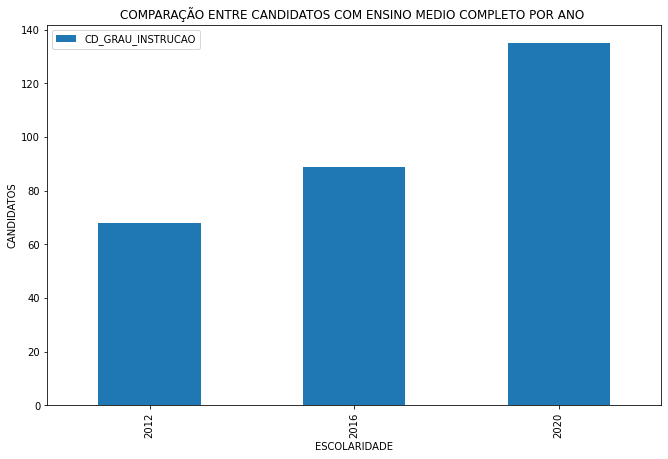

In [28]:
rate_medio = pd.DataFrame(medio)
rate_medio.plot(kind='bar')
plt.title('COMPARAÇÃO ENTRE CANDIDATOS COM ENSINO MEDIO COMPLETO POR ANO ')
plt.xlabel('ESCOLARIDADE')
plt.ylabel('CANDIDATOS')
plt.show()

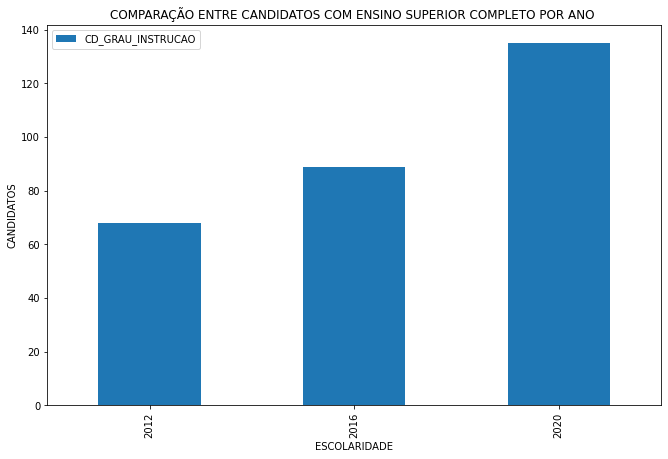

In [29]:
rate_superior = pd.DataFrame(medio)
rate_superior.plot(kind='bar')
plt.title('COMPARAÇÃO ENTRE CANDIDATOS COM ENSINO SUPERIOR COMPLETO POR ANO ')
plt.xlabel('ESCOLARIDADE')
plt.ylabel('CANDIDATOS')
plt.show()

In [30]:
#candidatos por partido em 2012
candidato2012_x_partido = candidatos[candidatos["ANO_ELEICAO"] == 2012].groupby('NR_PARTIDO').count()['SG_UE']
candidato2012_x_partido

NR_PARTIDO
10    23
11    10
12    10
13    26
14     7
15    24
19     1
20     7
22     6
23    15
25     5
27     1
28     3
36     1
40     2
43    10
45    21
50     5
55     9
65     8
Name: SG_UE, dtype: int64

In [31]:
#candidatos por partido em 2016
candidato2016_x_partido = candidatos[candidatos["ANO_ELEICAO"] == 2016].groupby('NR_PARTIDO').count()['SG_UE']
candidato2016_x_partido

NR_PARTIDO
10     8
11     4
12    14
13    18
14    21
15     3
16     3
17     9
19     7
20     4
22    19
23    13
25     8
27    21
28     2
31    11
35     1
36     7
40    22
43    16
45    17
50     5
51    21
55    19
65     2
77     4
90     3
Name: SG_UE, dtype: int64

In [32]:
#cadidatos por partido em 2020
candidato2020_x_partido = candidatos[candidatos["ANO_ELEICAO"] == 2020].groupby('NR_PARTIDO').count()['SG_UE']
candidato2020_x_partido

NR_PARTIDO
10    22
11    21
12    22
13    21
14    21
15    14
16     5
17    22
19    20
22    20
25    21
28    16
35    14
40    16
43    21
45    21
50     5
51    22
55    20
65    20
70    20
Name: SG_UE, dtype: int64

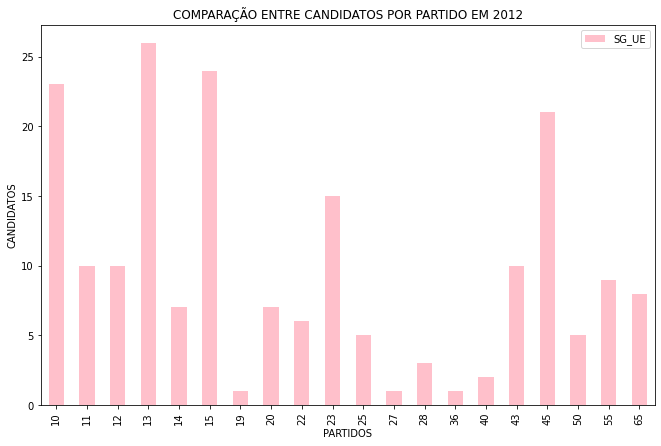

In [33]:
partido2012 = pd.DataFrame(candidato2012_x_partido)
partido2012.plot(kind='bar', color='pink')
plt.title('COMPARAÇÃO ENTRE CANDIDATOS POR PARTIDO EM 2012')
plt.xlabel('PARTIDOS')
plt.ylabel('CANDIDATOS')
plt.show()

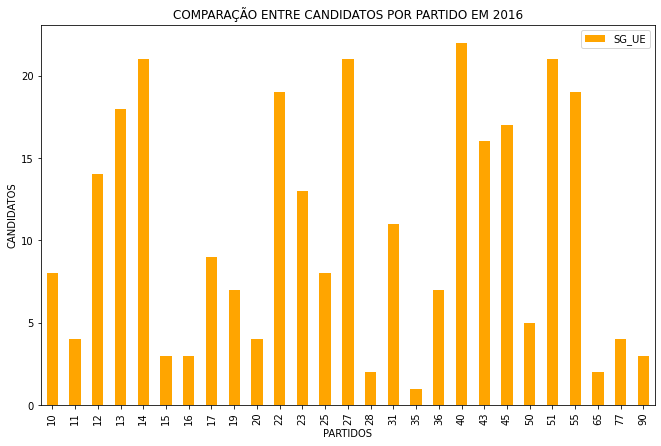

In [34]:
partido2016 = pd.DataFrame(candidato2016_x_partido)
partido2016.plot(kind='bar', color='orange')
plt.title('COMPARAÇÃO ENTRE CANDIDATOS POR PARTIDO EM 2016')
plt.xlabel('PARTIDOS')
plt.ylabel('CANDIDATOS')
plt.show()

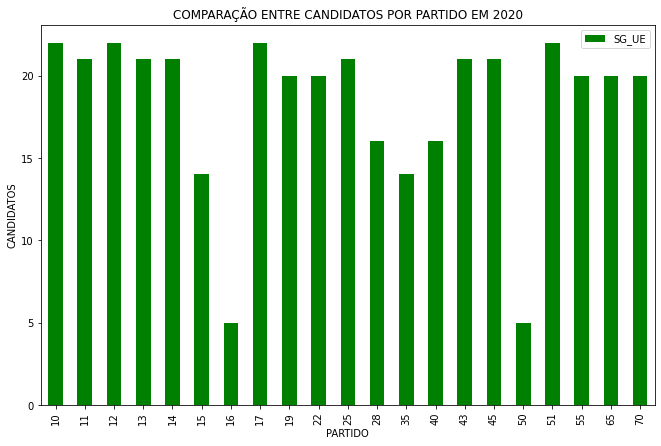

In [35]:
partido2020 = pd.DataFrame(candidato2020_x_partido)
partido2020.plot(kind='bar', color='green')
plt.title('COMPARAÇÃO ENTRE CANDIDATOS POR PARTIDO EM 2020')
plt.xlabel('PARTIDO')
plt.ylabel('CANDIDATOS')
plt.show()